<a href="https://colab.research.google.com/github/Axle-Bucamp/exploring/blob/main/vector_field_toying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

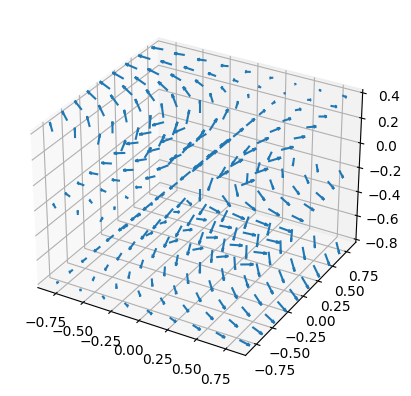

In [36]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.sin( x) * np.cos( y) * np.cos( z)
v = -np.cos(x) * np.sin( y) * np.cos( z)
w =  np.cos( x) * np.cos( y) * np.sin( z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

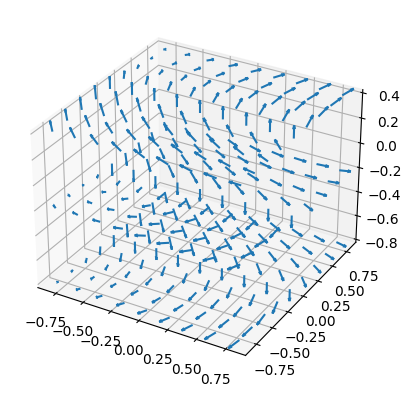

In [32]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.cos(x)*y
v = np.sin(y)*x
w = np.sin(z) * np.cos(z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

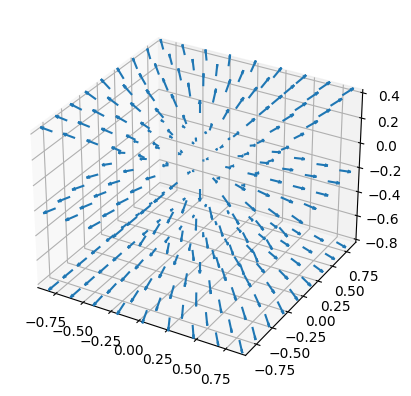

In [33]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.sin(x) * np.cos(x)
v = np.sin(y) * np.cos(y)
w = np.sin(z) * np.cos(z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

In [30]:
import plotly.figure_factory as ff

import numpy as np

x,y = np.meshgrid(np.arange(0, 4, .2), np.arange(0, 4, .2))
u = np.cos(x)*y
v = np.sin(y)*x

fig = ff.create_quiver(x, y, u, v)
fig.show()

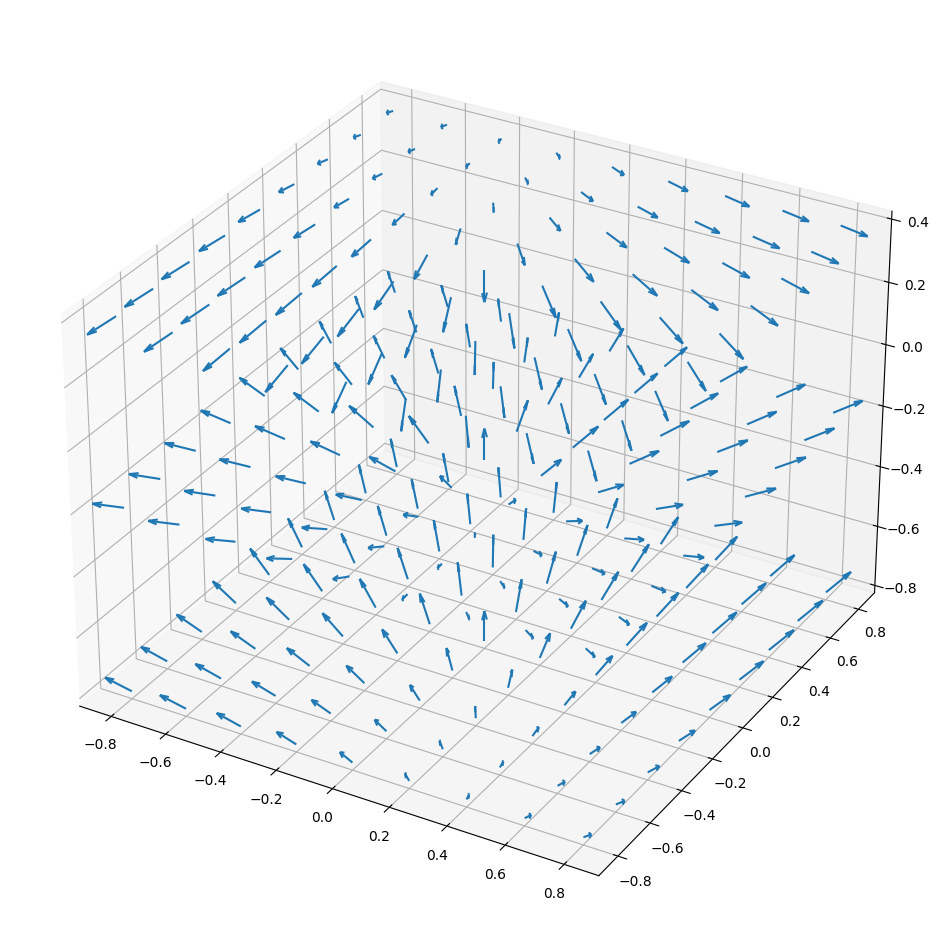

In [44]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure(figsize=(20,12)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.6))

# Make the direction data for the arrows
u = np.sin(x) * np.cos(x)
v = np.sin(y) * np.cos(y)
w = - np.sin(z) * np.cos(z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

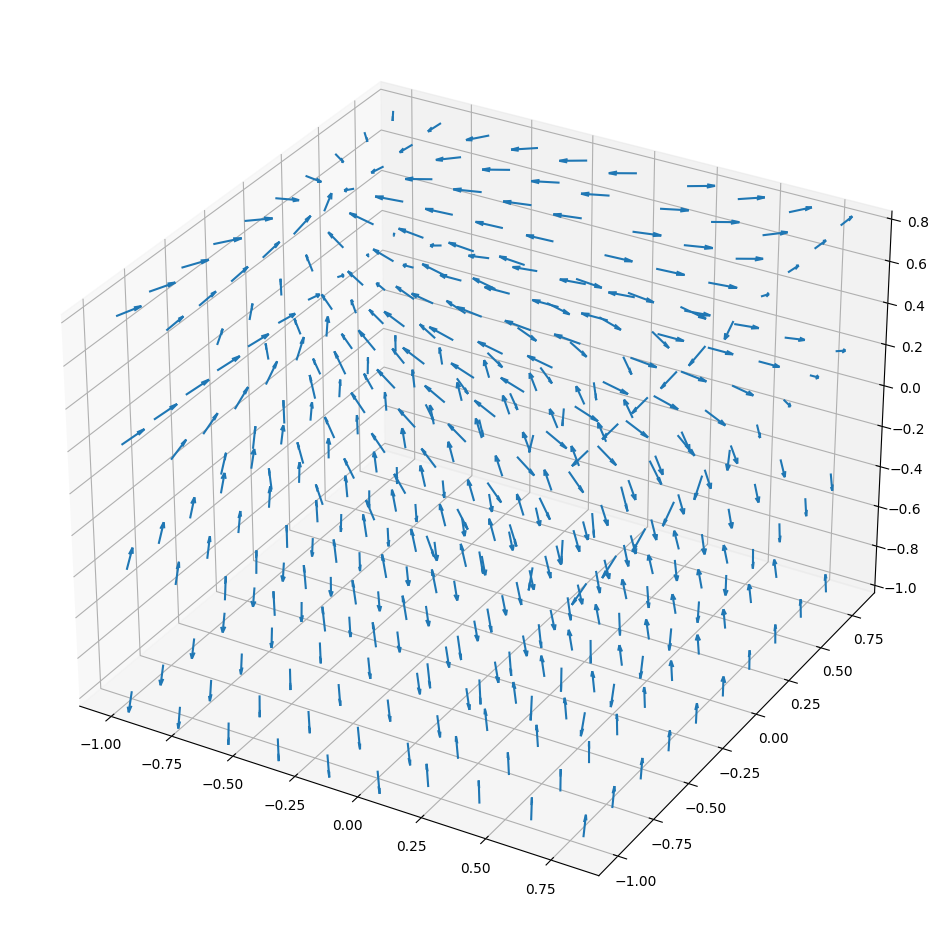

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

ax = plt.figure(figsize=(20,12)).add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-1, 1, 0.2),
                      np.arange(-1, 1, 0.2),
                      np.arange(-1, 1, 0.6))

lx = Symbol('x')
ly = Symbol('y')
lz = Symbol('z')

f = cos(lx) * ly * sin(lx) * ly / ( lz + cos(lz) )

# df/dx
fpx = f.diff(lx)
lfpx = lambdify([lx, ly, lz], fpx, 'numpy')

# df/dy
fpy = f.diff(ly)
lfpy = lambdify([lx, ly, lz], fpy, 'numpy')

# df/dz
fpz = f.diff(lz)
lfpz = lambdify([lx, ly, lz], fpz, 'numpy')

derivative_matrix = np.array([lfpx(x, y, z), lfpy(x, y, z), lfpz(x, y, z)])
axis_matrix = np.array([x, y, z])
# curl = np.linalg.det( derivative_matrix[0] * axis_matrix[0])
# div = np.dot(derivative_matrix, axis_matrix)

# need to be done matrix by matrix and not on full array
# div = delta . F = [df/dx, df/dy, df/dz] . [x, y, z] = [fx * dx, fy * dy, fz * dz]
# curl = determinant( delta * f)

lf = lambdify([lx, ly, lz], f, 'numpy')

# Make the direction data for the arrows
u = lfpx(x, y, z) * lf(x,1,1) # div on x
v = lfpy(x, y, z) * lf(1,y,1) # div on y
w = lfpz(x, y, z) * lf(1,1,z) # div on z

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

In [3]:
fpx

-y**2*sin(x)**2/(z + cos(z)) + y**2*cos(x)**2/(z + cos(z))

In [4]:
fpy

2*y*sin(x)*cos(x)/(z + cos(z))

In [5]:
fpz

y**2*(sin(z) - 1)*sin(x)*cos(x)/(z + cos(z))**2